# Frequence Signal Modulation

This notebook demonstrates various analog frequency modulation techniques:
1. Narrowband FM



In [11]:
import numpy as np 
import matplotlib.pyplot as plt

fs, fc, fm, duration = 100_000, 10_000, 500, 0.01
t = np.arange(0, duration, 1/fs)
m = np.sin(2*np.pi*fm*t)
Ac = 1.0

## NBFM (Narrowband FM) - β < 0.3, VHF voice

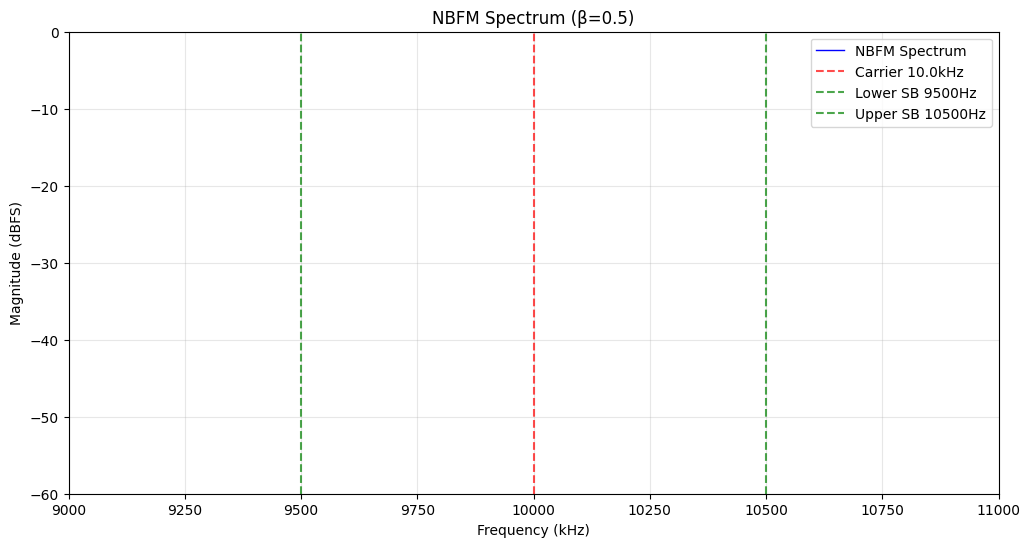

In [12]:
# NBFM
kf_nbfm = 250; beta_nbfm = kf_nbfm / fm  # β = 0.5
s_nbfm = Ac * np.cos(2*np.pi*fc*t + beta_nbfm * np.cos(2*np.pi*fm*t))

# FIXED FFT
N = len(s_nbfm)
freqs = np.fft.rfftfreq(N, 1/fs)
S_nbfm = np.fft.rfft(s_nbfm)

# **PROPER NORMALIZATION** (dB scale + power correction)
S_nbfm_db = 20 * np.log10(np.abs(S_nbfm) / N * 2)  # dBFS

plt.figure(figsize=(12, 6))
plt.plot(freqs/1000, S_nbfm_db, 'b-', linewidth=1, label='NBFM Spectrum')
plt.axvline(fc, color='r', linestyle='--', alpha=0.7, label=f'Carrier {fc/1000}kHz')
plt.axvline(fc-fm, color='g', linestyle='--', alpha=0.7, label=f'Lower SB {fc-fm}Hz')
plt.axvline(fc+fm, color='g', linestyle='--', alpha=0.7, label=f'Upper SB {fc+fm}Hz')
plt.xlim(9000, 11000)  # Zoom carrier region
plt.ylim(-60, 0)
plt.title(f'NBFM Spectrum (β={beta_nbfm:.1f})')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude (dBFS)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
